<a href="https://colab.research.google.com/github/jyuurin/EstudoBalistica/blob/main/ExercicioFisica_JuliaMendes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math as m
import matplotlib.pyplot as plt
import pandas as pd

Funçoes para todos os calculos necessários no trabalho.


In [ ]:

forcaG = 9.8

#v0x
def vel0x(velocidadeInicio, angulo):
  angulo = m.radians(angulo)
  cosTheta = m.cos(angulo)

  return round(velocidadeInicio * cosTheta, 5)

#v0y
def vel0y(velocidadeInicio, angulo):
  angulo = m.radians(angulo)
  senTheta = m.sin(angulo)

  return round(velocidadeInicio * senTheta,5)

#Vy
def velocidadeY(velocidadeInicialY, angulo, tempo):
  velocidadeInicial = vel0y(velocidadeInicialY, angulo)

  return velocidadeInicial - (forcaG * tempo)

#posx
def alcancesAtingidos(velocidadeInicio, angulo, tempo):
  velocidade = vel0x(velocidadeInicio, angulo)

  return round(velocidade * tempo, 5)

#posy
def alturasAtingidas(alturaInicio, velocidadeIncio, angulo, tempo):
  velocidadeIncialY = vel0y(velocidadeIncio, angulo)
  
  return round(alturaInicio + (velocidadeIncialY * tempo) - round(((forcaG * (tempo**2))/2), 5),5)

#angulo Instantaneo
def anguloIntantaneo(velocidadeY, velocidadeX):
  return m.atan(velocidadeY/velocidadeX)

#velocidade total
def velocidadeTotal(velocidadeX, velocidadeY):
  soma = (velocidadeX**2) + (velocidadeY**2)

  return round(m.sqrt(soma), 5)

Definindo valores atuantes e arrays para guardar todas as informações necessarias da trajetória.

In [ ]:
angulo = 45
velocidadeInicial = 10
posicaoInicio = 0.0
tempoInicio = 0.0


intervalos = []
alcancesEixoX = []
alturasEixoY = []
velocidades_X = []
velocidades_Y = []
velocidades_Total = []
compVX = []
compVY = []
angulos = []

Trajetória do objeto sendo feita e guardando informações no array

In [ ]:
while(tempoInicio >= 0):
  posicaoX = alcancesAtingidos(velocidadeInicial, angulo, tempoInicio)
  posicaoY = alturasAtingidas(posicaoInicio, velocidadeInicial, angulo, tempoInicio)
  velocidade0EixoX = vel0x(velocidadeInicial, angulo)
  velocidade0EixoY = vel0y(velocidadeInicial, angulo)
  velocidade_X = posicaoX
  velocidade_Y = velocidadeY(velocidadeInicial, angulo, tempoInicio)
  #velocidade_Total = velocidadeTotal(velocidadeInicial, angulo, tempoInicio)
  velocidade_Total = velocidadeTotal(velocidade_X, velocidade_Y)

  if tempoInicio > 0:
    angulo_instantaneo = anguloIntantaneo(velocidadeY(velocidadeInicial, angulo, tempoInicio), vel0x(velocidadeInicial, angulo))
  else:
    angulo_instantaneo = angulo

  intervalos.append(tempoInicio)
  alcancesEixoX.append(posicaoX)
  alturasEixoY.append(posicaoY)
  velocidades_X.append(velocidade_X)
  velocidades_Y.append(velocidade_Y)
  velocidades_Total.append(velocidade_Total)
  compVX.append(velocidade0EixoX)
  compVY.append(velocidade0EixoY)
  angulos.append(angulo_instantaneo)

  if tempoInicio > 0 and posicaoY < 0:
    break

  tempoInicio += 0.1



Exibição de informações coletadas

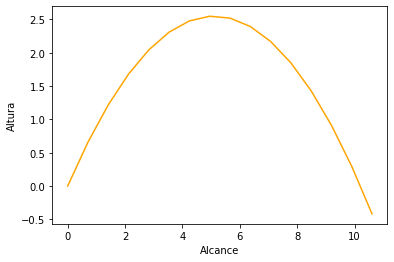

    Tempo(s)  Alcances(m)  Alturas(m)  V0x(m/s)  V0y(m/s)   Vx(m/s)  Vy(m/s)  \
0        0.0      0.00000     0.00000   7.07107   7.07107   0.00000  7.07107   
1        0.1      0.70711     0.65811   7.07107   7.07107   0.70711  6.09107   
2        0.2      1.41421     1.21821   7.07107   7.07107   1.41421  5.11107   
3        0.3      2.12132     1.68032   7.07107   7.07107   2.12132  4.13107   
4        0.4      2.82843     2.04443   7.07107   7.07107   2.82843  3.15107   
5        0.5      3.53553     2.31053   7.07107   7.07107   3.53553  2.17107   
6        0.6      4.24264     2.47864   7.07107   7.07107   4.24264  1.19107   
7        0.7      4.94975     2.54875   7.07107   7.07107   4.94975  0.21107   
8        0.8      5.65686     2.52086   7.07107   7.07107   5.65686 -0.76893   
9        0.9      6.36396     2.39496   7.07107   7.07107   6.36396 -1.74893   
10       1.0      7.07107     2.17107   7.07107   7.07107   7.07107 -2.72893   
11       1.1      7.77818     1.84918   

In [ ]:
plt.figure('Balística e Lançamento')
plt.xlabel("Alcance")
plt.ylabel("Altura")
plt.plot(alcancesEixoX, alturasEixoY, color="orange")
plt.show()

tabelaDadosColetados = pd.DataFrame({'Tempo(s)': intervalos, 'Alcances(m)':alcancesEixoX, 'Alturas(m)': alturasEixoY, 'V0x(m/s)': compVX, 'V0y(m/s)': compVY, 'Vx(m/s)': velocidades_X,'Vy(m/s)': velocidades_Y, 'Total': velocidade_Total, 'Angulo (°)': angulos})
print(tabelaDadosColetados)

